# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress
from scipy import stats
from datetime import datetime
import statsmodels.api as sm



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
cities[0:550]

['georgetown',
 'ancud',
 'belaya gora',
 'chara',
 'hithadhoo',
 'kodiak',
 'castro',
 'zhigansk',
 'kasempa',
 'churapcha',
 'fresnillo',
 'bara',
 'peebles',
 'puerto ayora',
 'pierre',
 'victoria',
 'obo',
 'barrow',
 'qui nhon',
 'chagda',
 'camacha',
 'hobart',
 'subate',
 'yellowknife',
 'pimentel',
 'port alfred',
 'arraial do cabo',
 'mazamari',
 'rikitea',
 'marawi',
 'mar del plata',
 'geraldton',
 'cape town',
 'isangel',
 'provideniya',
 'kudahuvadhoo',
 'shenjiamen',
 'vaini',
 'namatanai',
 'khatanga',
 'qaanaaq',
 'klaksvik',
 'prieska',
 'amderma',
 'butaritari',
 'bluff',
 'ekibastuz',
 'komsomolskiy',
 'pevek',
 'tuktoyaktuk',
 'cabo san lucas',
 'inirida',
 'taolanaro',
 'ushuaia',
 'san rafael',
 'marsh harbour',
 'shu',
 'bambous virieux',
 'asyut',
 'punta arenas',
 'tasiilaq',
 'sitka',
 'tiksi',
 'hilo',
 'mrirt',
 'upernavik',
 'abha',
 'ponta delgada',
 'merauke',
 'karakendzha',
 'genhe',
 'sao filipe',
 'mataura',
 'betanzos',
 'carnarvon',
 'kapaa',
 'sain

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

In [5]:
#make api call
city = "mataura"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

weather_response = requests.get(query_url)
weather_json = weather_response.json()

weather_response

<Response [200]>

In [6]:
weather_json

{'coord': {'lon': 168.8643, 'lat': -46.1927},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 53.47,
  'feels_like': 52.99,
  'temp_min': 53.47,
  'temp_max': 53.47,
  'pressure': 1016,
  'humidity': 95,
  'sea_level': 1016,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 1.3, 'deg': 253, 'gust': 6.24},
 'clouds': {'all': 99},
 'dt': 1644005851,
 'sys': {'type': 2,
  'id': 2008959,
  'country': 'NZ',
  'sunrise': 1643996598,
  'sunset': 1644048822},
 'timezone': 46800,
 'id': 6201424,
 'name': 'Mataura',
 'cod': 200}

In [7]:
#locate and extract information
lat =  weather_json["coord"]["lat"]
lng =  weather_json["coord"]["lon"]
country = weather_json ["sys"]["country"]
cloudy = weather_json ["clouds"]["all"]
timestamp = weather_json["dt"]
cityname = weather_json["name"]
wind = weather_json["wind"]["speed"]                              
temp = weather_json["main"]["temp"]
max_temp = weather_json["main"]["temp_max"]
pressure =  weather_json["main"]["pressure"]
humidity =  weather_json["main"]["humidity"]

In [9]:
#create empty lists
lats = []
lngs = []
countries = []
cloudies = []
timestamps = []
cityNames = []
winds = []
temps = []
maxTemps = []
pressures = []
humidities = []

#loop through all cities
for city in cities [0:550]:
    print(city)
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    weather_response = requests.get(query_url)
    
    try:
        weather_json = weather_response.json()
        print()
        
        lat =  weather_json["coord"]["lat"]
        lng =  weather_json["coord"]["lon"]
        country = weather_json ["sys"]["country"]
        cloudy = weather_json ["clouds"]["all"]
        timestamp = weather_json["dt"]
        cityname = weather_json["name"]
        wind = weather_json["wind"]["speed"]                              
        temp = weather_json["main"]["temp"]
        max_temp = weather_json["main"]["temp_max"]
        pressure =  weather_json["main"]["pressure"]
        humidity =  weather_json["main"]["humidity"]
    
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        cloudies.append(cloudy)
        timestamps.append(timestamp)
        cityNames.append(cityname)
        winds.append(wind)
        temps.append(temp)
        maxTemps.append(max_temp)
        pressures.append(pressure)
        humidities.append(humidity)
    
    except Exception as e:
        print(e)
    
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(np.nan)
        cloudies.append(np.nan)
        timestamps.append(np.nan)
        cityNames.append(np.nan)
        winds.append(np.nan)
        temps.append(np.nan)
        maxTemps.append(np.nan)
        pressures.append(np.nan)
        humidities.append(np.nan)
    
        time.sleep(10)
    
        
    

georgetown

ancud

belaya gora

chara

hithadhoo

kodiak

castro

zhigansk

kasempa

churapcha

fresnillo

bara

peebles

puerto ayora

pierre

victoria

obo

barrow

qui nhon

chagda

'coord'
camacha

hobart

subate

yellowknife

pimentel

port alfred

arraial do cabo

mazamari

rikitea

marawi

mar del plata

geraldton

cape town

isangel

provideniya

kudahuvadhoo

shenjiamen

vaini

namatanai

khatanga

qaanaaq

klaksvik

prieska

amderma

'coord'
butaritari

bluff

ekibastuz

komsomolskiy

pevek

tuktoyaktuk

cabo san lucas

inirida

taolanaro

'coord'
ushuaia

san rafael

marsh harbour

shu

bambous virieux

asyut

punta arenas

tasiilaq

sitka

tiksi

hilo

mrirt

'coord'
upernavik

abha

ponta delgada

merauke

karakendzha

'coord'
genhe

sao filipe

mataura

betanzos

carnarvon

kapaa

saint-philippe

veinticinco de mayo

tsihombe

'coord'
marsa matruh

atuona

lata

mount isa

boddam

busselton

hamilton

talara

aklavik

longyearbyen

mangai

muravlenko

sayyan

bhatapara

g

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
#Create dataframe
df = pd.DataFrame()

df["latitude"] = lats
df["longitude"] = lngs
df["country"] = countries
df["cloudiness"] = cloudies
df["timestamp"] = timestamps
df["cify_name"] = cityNames
df["wind"] = winds
df["temp"] = temps
df["max_temp"]= maxTemps
df["pressure"] = pressures
df["humidity"] = humidities

df.head()



,latitude,longitude,country,cloudiness,timestamp,cify_name,wind,temp,max_temp,pressure,humidity
0,5.4112,100.3354,MY,40.0,1.644006e+09,George Town,3.44,77.95,79.90,1008.0,93.0
1,-41.8697,-73.8203,CL,80.0,1.644006e+09,Ancud,9.89,69.22,69.22,1021.0,69.0
2,68.5333,146.4167,RU,52.0,1.644006e+09,Belaya Gora,1.07,-39.33,-39.33,1027.0,100.0
3,56.9064,118.2631,RU,99.0,1.644006e+09,Chara,1.72,-15.00,-15.00,1038.0,86.0
4,-0.6000,73.0833,MV,60.0,1.644006e+09,Hithadhoo,10.38,81.79,81.79,1009.0,73.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    507 non-null    float64
 1   longitude   507 non-null    float64
 2   country     507 non-null    object 
 3   cloudiness  507 non-null    float64
 4   timestamp   507 non-null    float64
 5   cify_name   507 non-null    object 
 6   wind        507 non-null    float64
 7   temp        507 non-null    float64
 8   max_temp    507 non-null    float64
 9   pressure    507 non-null    float64
 10  humidity    507 non-null    float64
dtypes: float64(9), object(2)
memory usage: 47.4+ KB


In [201]:
#drop null values
df.dropna(inplace=True)
df

,latitude,longitude,country,cloudiness,timestamp,cify_name,wind,temp,max_temp,pressure,humidity
0,5.4112,100.3354,MY,40.0,2022-02-04 20:22:32,George Town,3.44,77.95,79.90,1008.0,93.0
1,-41.8697,-73.8203,CL,80.0,2022-02-04 20:26:05,Ancud,9.89,69.22,69.22,1021.0,69.0
2,68.5333,146.4167,RU,52.0,2022-02-04 20:26:05,Belaya Gora,1.07,-39.33,-39.33,1027.0,100.0
3,56.9064,118.2631,RU,99.0,2022-02-04 20:26:05,Chara,1.72,-15.00,-15.00,1038.0,86.0
4,-0.6000,73.0833,MV,60.0,2022-02-04 20:26:06,Hithadhoo,10.38,81.79,81.79,1009.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
545,47.8169,-79.8664,CA,20.0,2022-02-04 20:35:27,Englehart,2.30,1.96,3.22,1025.0,46.0
546,57.5409,28.0126,RU,54.0,2022-02-04 20:35:59,Palkino,13.38,15.55,15.55,1010.0,90.0
547,2.8197,-60.6733,BR,75.0,2022-02-04 20:36:00,Boa Vista,12.66,89.58,89.58,1009.0,45.0
548,-2.6500,10.0000,GA,41.0,2022-02-04 20:32:14,Gamba,2.66,76.48,76.48,1013.0,84.0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 549
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    507 non-null    float64       
 1   longitude   507 non-null    float64       
 2   country     507 non-null    object        
 3   cloudiness  507 non-null    float64       
 4   timestamp   507 non-null    datetime64[ns]
 5   cify_name   507 non-null    object        
 6   wind        507 non-null    float64       
 7   temp        507 non-null    float64       
 8   max_temp    507 non-null    float64       
 9   pressure    507 non-null    float64       
 10  humidity    507 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 47.5+ KB


In [204]:
#save to csv
df.to_csv("my_Weather_data.csv", index=False)

In [205]:
df.head()

,latitude,longitude,country,cloudiness,timestamp,cify_name,wind,temp,max_temp,pressure,humidity
0,5.4112,100.3354,MY,40.0,2022-02-04 20:22:32,George Town,3.44,77.95,79.90,1008.0,93.0
1,-41.8697,-73.8203,CL,80.0,2022-02-04 20:26:05,Ancud,9.89,69.22,69.22,1021.0,69.0
2,68.5333,146.4167,RU,52.0,2022-02-04 20:26:05,Belaya Gora,1.07,-39.33,-39.33,1027.0,100.0
3,56.9064,118.2631,RU,99.0,2022-02-04 20:26:05,Chara,1.72,-15.00,-15.00,1038.0,86.0
4,-0.6000,73.0833,MV,60.0,2022-02-04 20:26:06,Hithadhoo,10.38,81.79,81.79,1009.0,73.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [206]:
humidity_info = df.loc[df['humidity']>100]
humidity_info

,latitude,longitude,country,cloudiness,timestamp,cify_name,wind,temp,max_temp,pressure,humidity


In [207]:
df[(df['humidity'] >= 100)]

,latitude,longitude,country,cloudiness,timestamp,cify_name,wind,temp,max_temp,pressure,humidity
2,68.5333,146.4167,RU,52.0,2022-02-04 20:26:05,Belaya Gora,1.07,-39.33,-39.33,1027.0,100.0
9,62.0025,132.4325,RU,100.0,2022-02-04 20:26:07,Churapcha,1.81,-37.57,-37.57,1030.0,100.0
37,-21.2000,-175.2000,TO,100.0,2022-02-04 20:23:18,Vaini,14.97,75.36,75.36,1010.0,100.0
39,71.9667,102.5000,RU,64.0,2022-02-04 20:24:00,Khatanga,3.40,-35.81,-35.81,1024.0,100.0
48,69.7008,170.3133,RU,82.0,2022-02-04 20:23:44,Pevek,5.41,-22.58,-22.58,1025.0,100.0
65,72.7868,-56.1549,GL,86.0,2022-02-04 20:23:18,Upernavik,9.08,-2.85,-2.85,992.0,100.0
98,55.3422,-131.6461,US,100.0,2022-02-04 20:23:35,Ketchikan,11.50,43.27,43.27,1003.0,100.0
104,52.4675,96.1100,RU,93.0,2022-02-04 20:27:34,Toora-Khem,1.03,-21.12,-21.12,1057.0,100.0
110,65.7500,150.8500,RU,98.0,2022-02-04 20:27:36,Zyryanka,1.77,-40.50,-40.50,1027.0,100.0
114,70.6333,147.9167,RU,67.0,2022-02-04 20:24:14,Chokurdakh,2.21,-31.11,-31.11,1026.0,100.0


In [208]:
#  Get the indices of cities that have humidity over 100%.


In [209]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

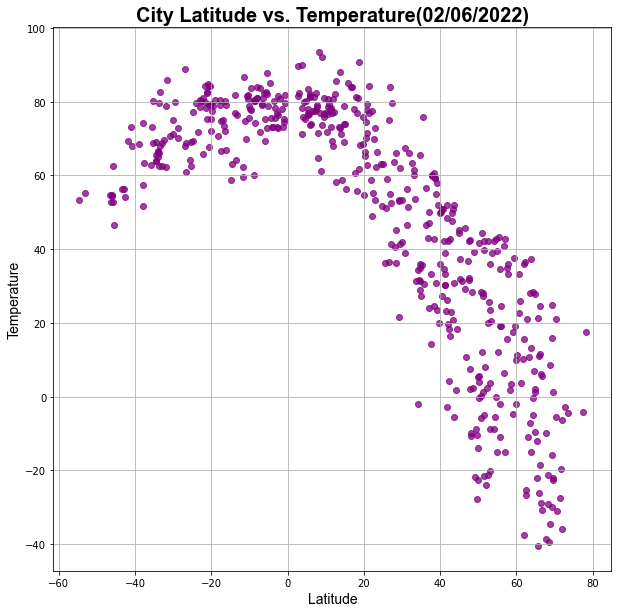

In [287]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')
plt.figure(figsize=(10,10))
plt.scatter(df["latitude"], df["temp"], alpha=.75, color = 'purple', edgecolors="purple")
plt.title(f"City Latitude vs. Temperature({today_date})",fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel("Latitude", fontsize = 14, fontname="Arial")
plt.ylabel("Temperature", fontsize = 14, fontname="Arial")
plt.grid(True) 
plt.savefig("temp.png")
plt.show()

## Latitude vs. Humidity Plot

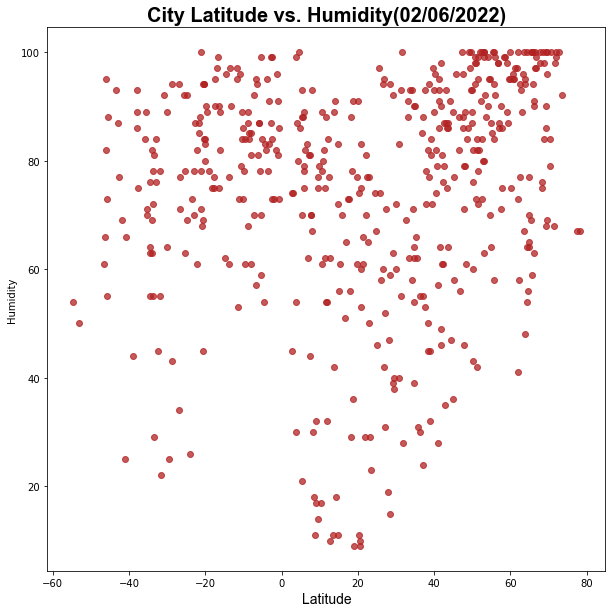

In [288]:
plt.figure(figsize=(10,10))
plt.scatter(df["latitude"], df["humidity"], alpha=.75, color = "firebrick", edgecolors="firebrick")
plt.title(f"City Latitude vs. Humidity({today_date})",fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel("Latitude", fontsize = 14, fontname="Arial")
plt.ylabel("Humidity") 
plt.savefig("humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

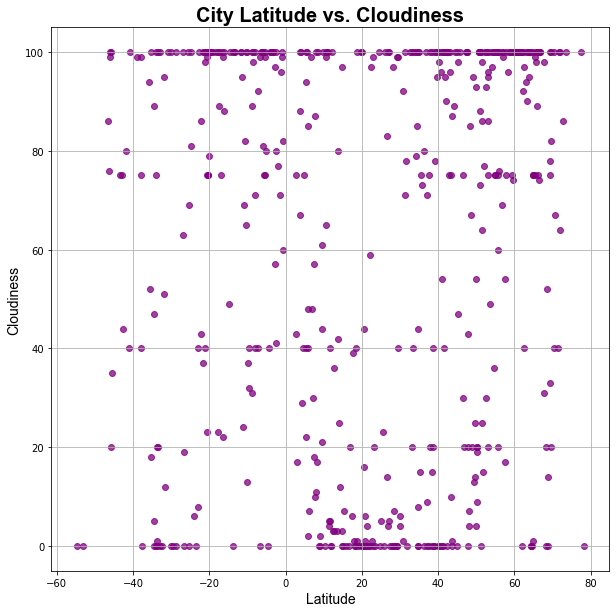

In [212]:
plt.figure(figsize=(10,10))
plt.scatter(df["latitude"], df["cloudiness"], alpha=.75, color = 'purple', edgecolors="purple")
plt.title(f"City Latitude vs. Cloudiness({today_date})",fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel("Latitude", fontsize = 14, fontname="Arial")
plt.ylabel("Cloudiness", fontsize = 14, fontname="Arial")
plt.grid(True) 
plt.savefig("cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

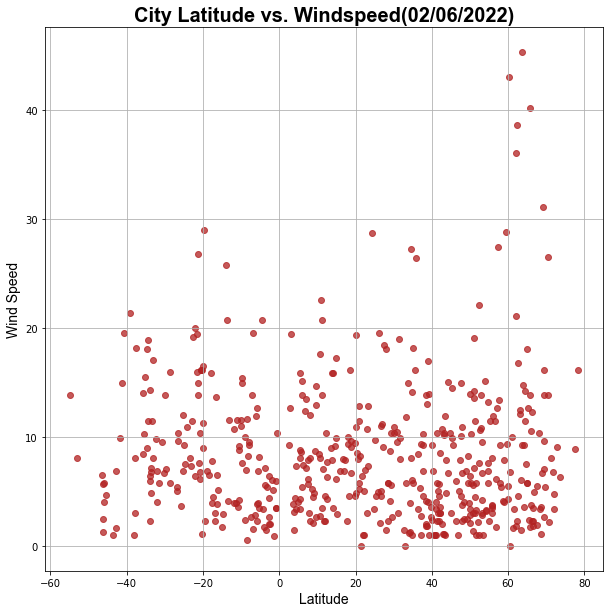

In [289]:
plt.figure(figsize=(10,10))
plt.scatter(df["latitude"], df["wind"], alpha=.75,color = "firebrick", edgecolors="firebrick")
plt.title(f"City Latitude vs. Windspeed({today_date})",fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel("Latitude", fontsize = 14, fontname="Arial")
plt.ylabel("Wind Speed", fontsize = 14, fontname="Arial")
plt.grid(True) 
plt.savefig("wind.png")
plt.show()

## Linear Regression

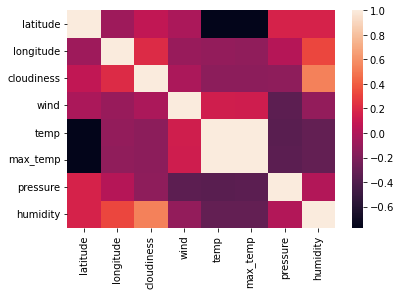

In [214]:
corrs = df.corr()
sns.heatmap(corrs)
plt.show()

In [215]:
corrs

,latitude,longitude,cloudiness,wind,temp,max_temp,pressure,humidity
latitude,1.000000,-0.080236,0.071150,-0.022437,-0.772972,-0.769223,0.167120,0.162634
longitude,-0.080236,1.000000,0.204008,-0.100444,-0.115832,-0.129453,0.018094,0.319155
cloudiness,0.071150,0.204008,1.000000,-0.021459,-0.143523,-0.145363,-0.141101,0.529455
wind,-0.022437,-0.100444,-0.021459,1.000000,0.135388,0.131766,-0.349893,-0.121364
temp,-0.772972,-0.115832,-0.143523,0.135388,1.000000,0.998895,-0.360164,-0.317603
max_temp,-0.769223,-0.129453,-0.145363,0.131766,0.998895,1.000000,-0.355731,-0.320066
pressure,0.167120,0.018094,-0.141101,-0.349893,-0.360164,-0.355731,1.000000,0.002921
humidity,0.162634,0.319155,0.529455,-0.121364,-0.317603,-0.320066,0.002921,1.000000


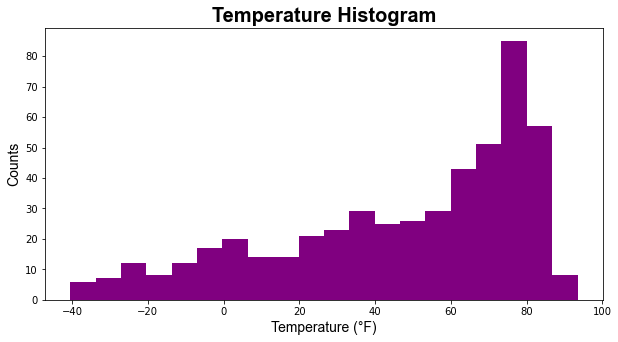

In [299]:
plt.figure(figsize=(10,5))
plt.hist(df.temp, bins=20, color = 'purple')
plt.title("Temperature Histogram", fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel('Temperature (°F)', fontsize = 14, fontname = "Arial")
plt.ylabel('Counts', fontsize = 14, fontname = "Arial")
plt.show()

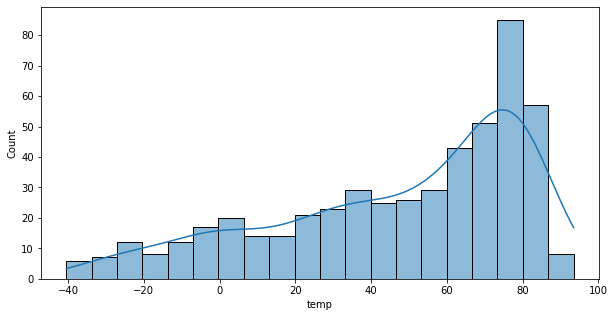

In [300]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="temp", kde=True, bins=20)
plt.show()

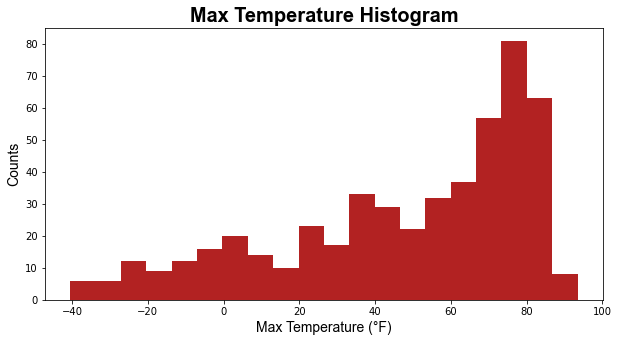

In [301]:
plt.figure(figsize=(10,5))
plt.hist(df.max_temp, bins=20, color = 'firebrick')
plt.title("Max Temperature Histogram", fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel('Max Temperature (°F)', fontsize = 14, fontname = "Arial")
plt.ylabel('Counts', fontsize = 14, fontname = "Arial")
plt.show()

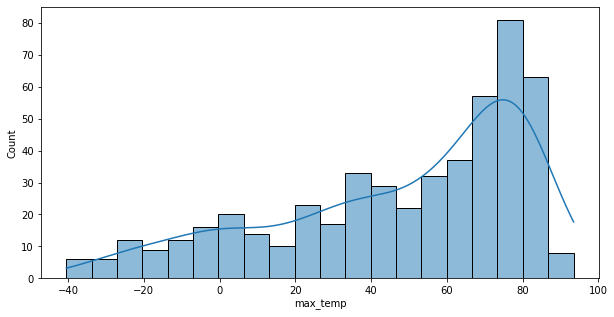

In [302]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="max_temp", kde=True, bins=20)
plt.show()

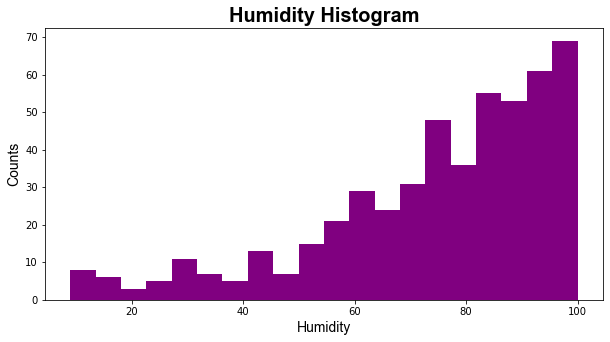

In [303]:
plt.figure(figsize=(10,5))
plt.hist(df.humidity, bins=20, color = 'purple')
plt.title("Humidity Histogram", fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel('Humidity', fontsize = 14, fontname = "Arial")
plt.ylabel('Counts', fontsize = 14, fontname = "Arial")
plt.show()

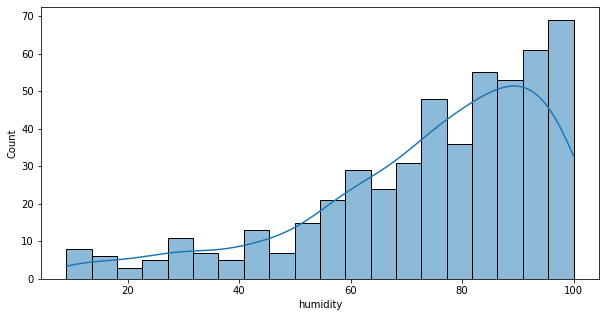

In [304]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="humidity", kde=True, bins=20)
plt.show()

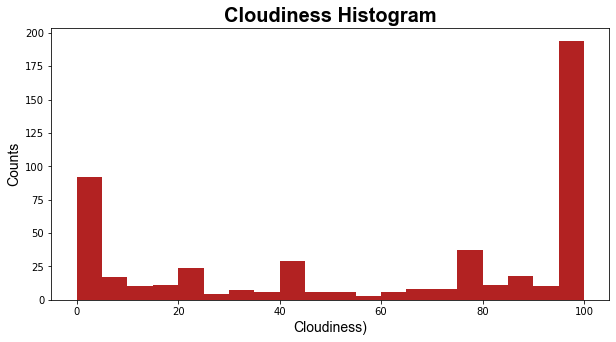

In [305]:
plt.figure(figsize=(10,5))
plt.hist(df.cloudiness, bins=20, color = 'firebrick')
plt.title("Cloudiness Histogram", fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel('Cloudiness)', fontsize = 14, fontname = "Arial")
plt.ylabel('Counts', fontsize = 14, fontname = "Arial")
plt.show()

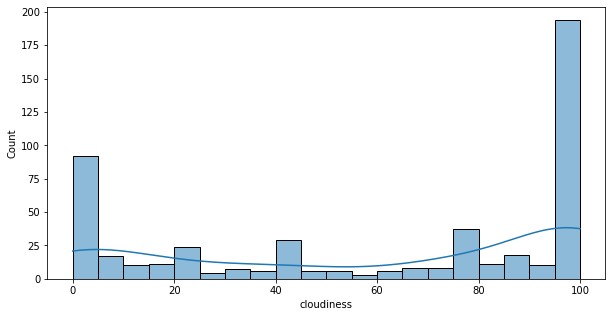

In [306]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="cloudiness", kde=True, bins=20)
plt.show()

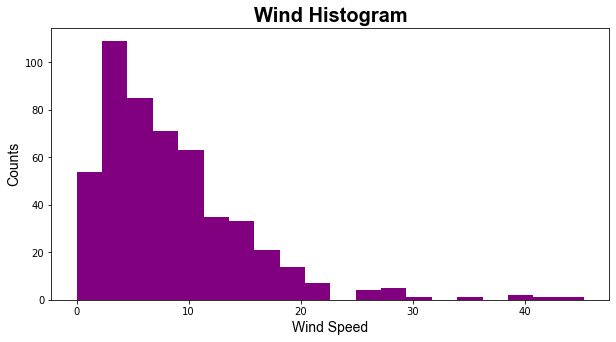

In [307]:
plt.figure(figsize=(10,5))
plt.hist(df.wind, bins=20, color = 'purple')
plt.title("Wind Histogram", fontsize = 20, fontname = "Arial", fontweight = "bold")
plt.xlabel('Wind Speed', fontsize = 14, fontname = "Arial")
plt.ylabel('Counts', fontsize = 14, fontname = "Arial")
plt.show()

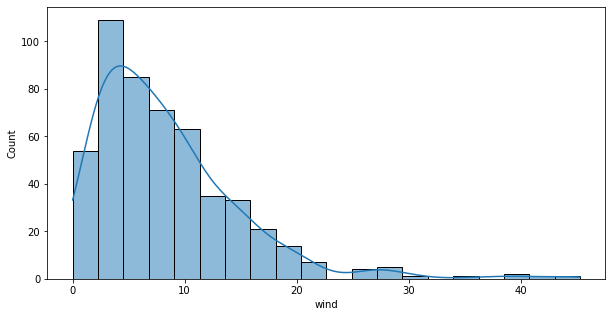

In [308]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="wind", kde=True, bins=20)
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [309]:
northern= df[df["latitude"] >= 0]
southern = df[df["latitude"]< 0]

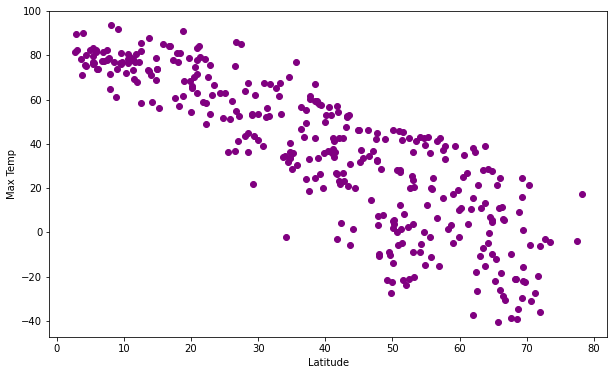

In [310]:
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['max_temp']
plt.scatter(x_values,y_values, color= 'purple')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [311]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [312]:
linregress(x_values, y_values)

LinregressResult(slope=-1.4339132012228513, intercept=93.16779626404838, rvalue=-0.8541985774115413, pvalue=5.175078453067066e-102, stderr=0.04652128369253519, intercept_stderr=2.050215786691272)

In [313]:
preds = x_values * slope + intercept

preds

0      85.408605
2      -5.103007
3      11.568958
5      10.301952
7      -2.574158
         ...    
543    24.331933
545    24.602512
546    10.659140
547    89.124591
549    48.931574
Name: latitude, Length: 354, dtype: float64

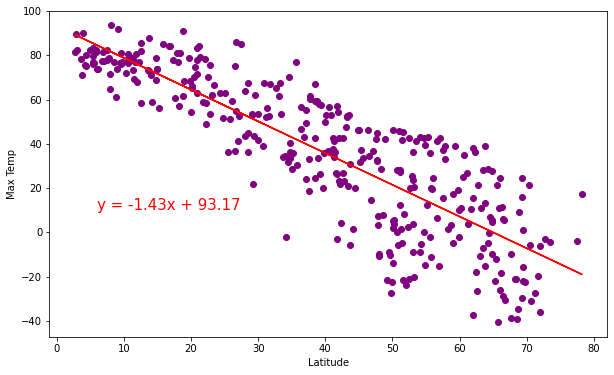

In [314]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("ntemp_regression.png")
plt.show()

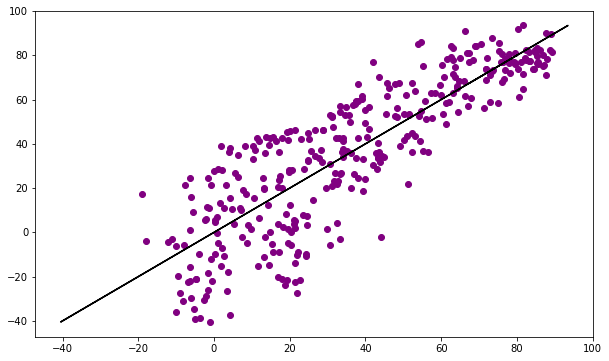

In [315]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'purple')
plt.plot(y_values, y_values, color="black") 
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'purple')
plt.plot(y_values, y_values, color="black")
plt.show()

In [317]:
X = northern["latitude"]
X = sm.add_constant(X)

y = northern["max_temp"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               max_temp   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     950.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          5.18e-102
Time:                        20:24:53   Log-Likelihood:                -1516.5
No. Observations:                 354   AIC:                             3037.
Df Residuals:                     352   BIC:                             3045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.1678      2.050     45.443      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

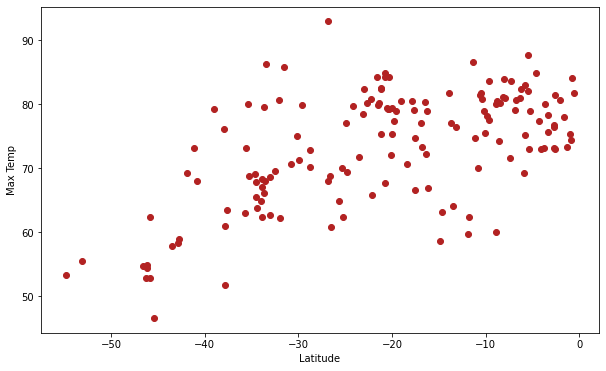

In [235]:
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['max_temp']
plt.scatter(x_values,y_values, color= 'firebrick')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("wind.png")
plt.show()

In [320]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [321]:
linregress(x_values, y_values)

LinregressResult(slope=0.3907331389951947, intercept=81.4894772237319, rvalue=0.5904109254854163, pvalue=9.586983068825125e-16, stderr=0.043467658287675535, intercept_stderr=1.0770201671770567)

In [322]:
preds = x_values * slope + intercept

preds

1      65.129598
4      81.255037
6      71.802773
8      76.230834
13     81.200608
         ...    
528    79.395851
537    80.994536
539    77.555537
540    77.517011
548    80.454034
Name: latitude, Length: 153, dtype: float64

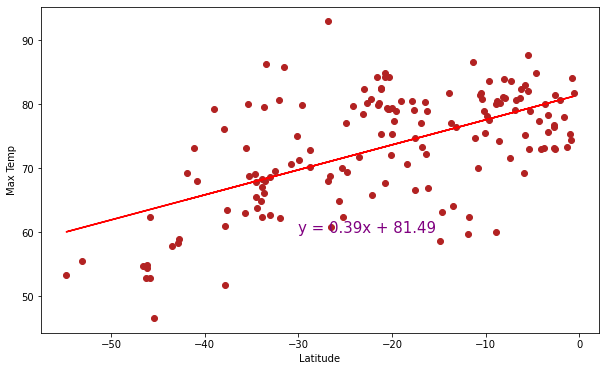

In [323]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="firebrick")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("stemp_regression.png")
plt.show()

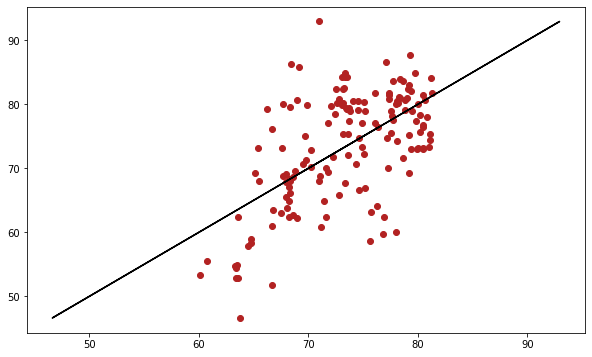

In [324]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'firebrick')
plt.plot(y_values, y_values, color="black")
plt.show()

In [325]:
X = southern["latitude"]
X = sm.add_constant(X) # adding a constant

y = southern["max_temp"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               max_temp   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     80.80
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           9.59e-16
Time:                        20:26:02   Log-Likelihood:                -518.61
No. Observations:                 153   AIC:                             1041.
Df Residuals:                     151   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.4895      1.077     75.662      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

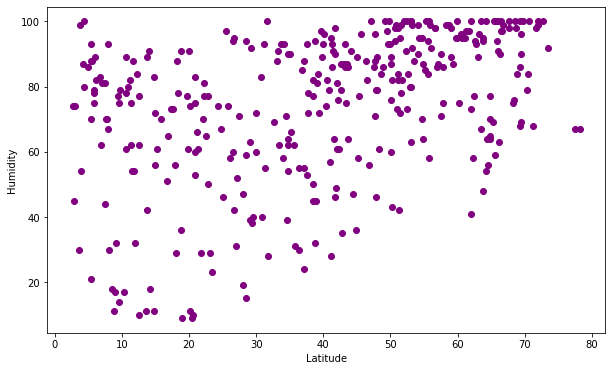

In [326]:
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['humidity']
plt.scatter(x_values,y_values, color= 'purple')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [327]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [328]:
linregress(x_values, y_values)

LinregressResult(slope=0.48085620511639127, intercept=54.66155889075704, rvalue=0.41876472246730945, pvalue=1.8322013160994742e-16, stderr=0.05557826402521101, intercept_stderr=2.449361351558474)

In [329]:
preds = x_values * slope + intercept

preds

0      57.263568
2      87.616221
3      82.025354
5      82.450239
7      86.768183
         ...    
543    77.745350
545    77.654612
546    82.330458
547    56.017429
549    69.495973
Name: latitude, Length: 354, dtype: float64

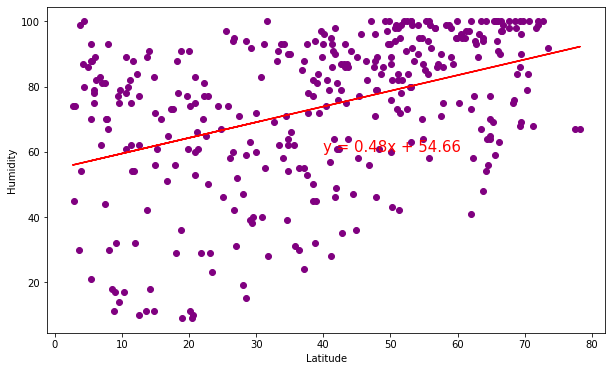

In [330]:
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("nhumidity_regression.png")
plt.show()

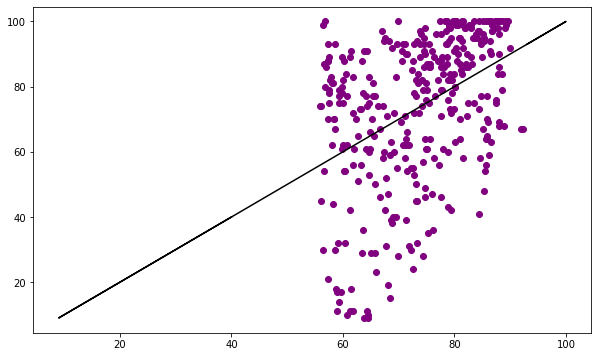

In [331]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'purple')
plt.plot(y_values, y_values, color="black")
plt.show()

In [332]:
X = northern["latitude"]
X = sm.add_constant(X) # adding a constant

y = northern["humidity"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     74.85
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.83e-16
Time:                        20:26:45   Log-Likelihood:                -1579.4
No. Observations:                 354   AIC:                             3163.
Df Residuals:                     352   BIC:                             3171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.6616      2.449     22.317      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

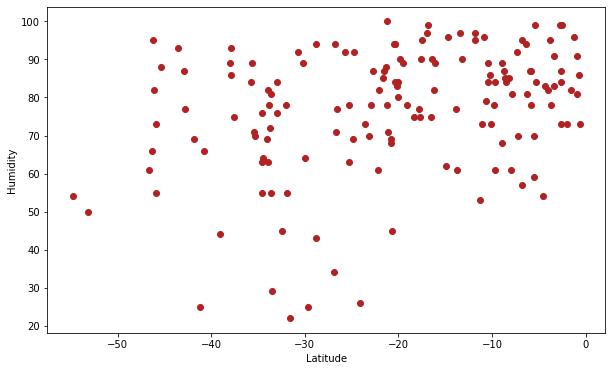

In [333]:
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['humidity']
plt.scatter(x_values,y_values, color= 'firebrick')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [334]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [335]:
linregress(x_values, y_values)

LinregressResult(slope=0.4013448647878419, intercept=85.2317179225568, rvalue=0.32617846692711094, pvalue=3.8780862564995576e-05, stderr=0.09465583228344074, intercept_stderr=2.3453354591935724)

In [336]:
preds = x_values * slope + intercept

preds

1      68.427529
4      84.990911
6      75.281937
8      79.830258
13     84.935004
         ...    
528    83.081232
537    84.723334
539    81.190938
540    81.151365
548    84.168154
Name: latitude, Length: 153, dtype: float64

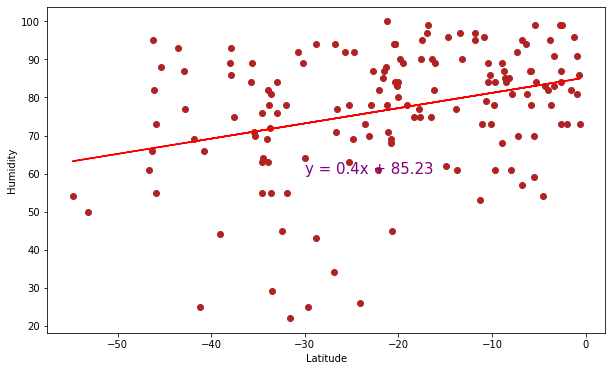

In [337]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="firebrick")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("shumidity_regression.png")
plt.show()

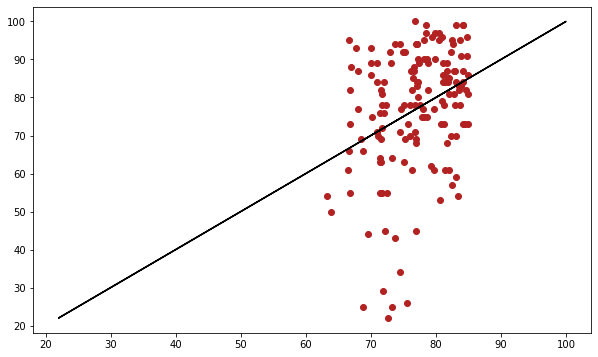

In [338]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'firebrick')
plt.plot(y_values, y_values, color="black")
plt.show()

In [339]:
X = southern["latitude"]
X = sm.add_constant(X) # adding a constant

y = southern["humidity"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.88e-05
Time:                        20:27:17   Log-Likelihood:                -637.68
No. Observations:                 153   AIC:                             1279.
Df Residuals:                     151   BIC:                             1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.2317      2.345     36.341      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

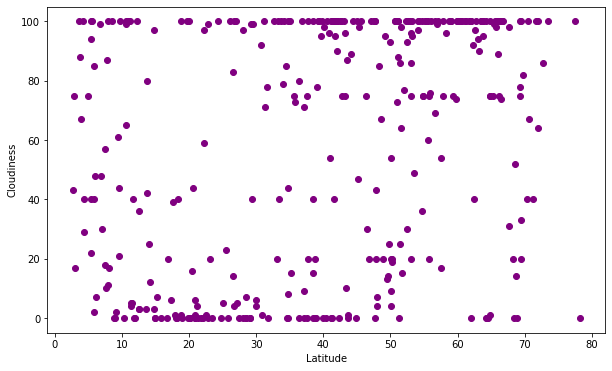

In [340]:
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['cloudiness']
plt.scatter(x_values,y_values, color= 'purple')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [341]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [342]:
linregress(x_values, y_values)

LinregressResult(slope=0.6664300518096304, intercept=30.72835790247493, rvalue=0.3243724681870784, pvalue=4.071175989164195e-10, stderr=0.10358526869355311, intercept_stderr=4.565053590261461)

In [343]:
preds = x_values * slope + intercept

preds

0      34.334544
2      76.401009
3      68.652493
5      69.241351
7      75.225693
         ...    
543    62.720732
545    62.594977
546    69.075343
547    32.607491
549    51.287725
Name: latitude, Length: 354, dtype: float64

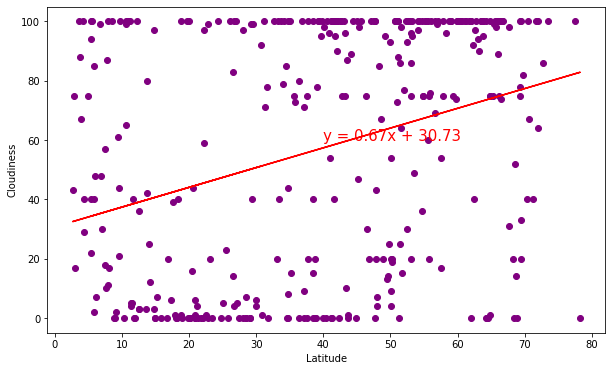

In [344]:
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("ncloudiness_regression.png")
plt.show()

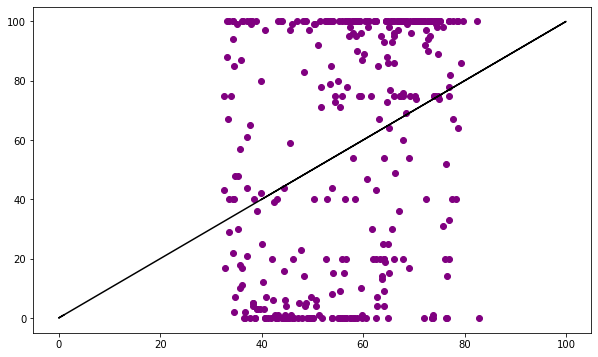

In [345]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'purple')
plt.plot(y_values, y_values, color="black")
plt.show()

In [346]:
X = northern["latitude"]
X = sm.add_constant(X) # adding a constant

y = northern["cloudiness"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             cloudiness   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     41.39
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.07e-10
Time:                        20:27:58   Log-Likelihood:                -1799.8
No. Observations:                 354   AIC:                             3604.
Df Residuals:                     352   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7284      4.565      6.731      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

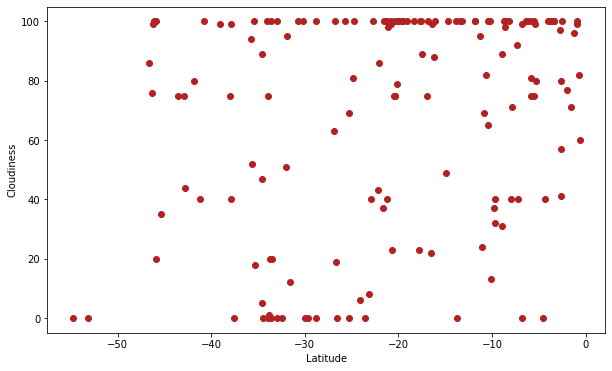

In [351]:
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['cloudiness']
plt.scatter(x_values,y_values, color= 'firebrick')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [352]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [353]:
linregress(x_values, y_values)

LinregressResult(slope=0.7324897822115478, intercept=82.63587721261327, rvalue=0.2679548731087413, pvalue=0.0008119458097262333, stderr=0.21432471908196174, intercept_stderr=5.31043202852449)

In [354]:
preds = x_values * slope + intercept

preds

1      51.966750
4      82.196383
6      64.476650
8      72.777737
13     82.094348
         ...    
528    78.711050
537    81.708032
539    75.261097
540    75.188873
548    80.694779
Name: latitude, Length: 153, dtype: float64

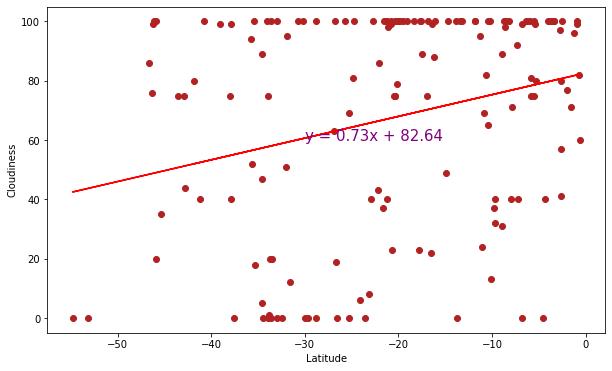

In [355]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="firebrick")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("scloudiness_regression.png")
plt.show()

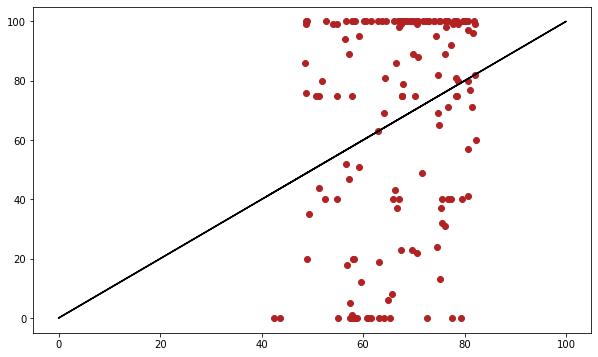

In [356]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'firebrick')
plt.plot(y_values, y_values, color="black")
plt.show()

In [357]:
X = southern["latitude"]
X = sm.add_constant(X) # adding a constant

y = southern["cloudiness"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             cloudiness   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     11.68
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           0.000812
Time:                        20:28:44   Log-Likelihood:                -762.72
No. Observations:                 153   AIC:                             1529.
Df Residuals:                     151   BIC:                             1535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6359      5.310     15.561      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

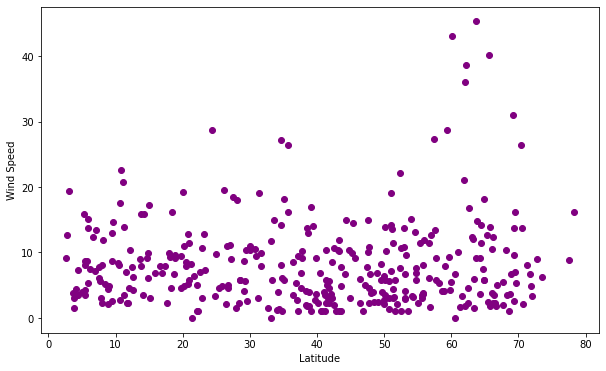

In [358]:
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['wind']
plt.scatter(x_values,y_values, color= 'purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [359]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [360]:
linregress(x_values, y_values)

LinregressResult(slope=0.01983136873267497, intercept=7.399033187713023, rvalue=0.05875343623453769, pvalue=0.27025210228708574, stderr=0.017959622527018437, intercept_stderr=0.7914893722895636)

In [361]:
preds = x_values * slope + intercept

preds

0      7.506345
2      8.758142
3      8.527565
5      8.545088
7      8.723168
         ...   
543    8.351050
545    8.347308
546    8.540148
547    7.454952
549    8.010831
Name: latitude, Length: 354, dtype: float64

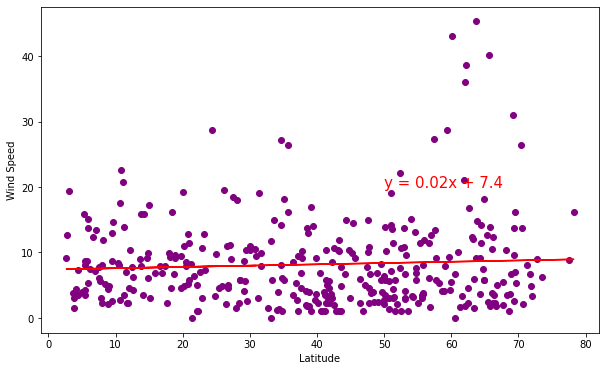

In [362]:
plt.figure(figsize=(10,6))
x_values = northern['latitude']
y_values = northern['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("nwind_regression.png")
plt.show()

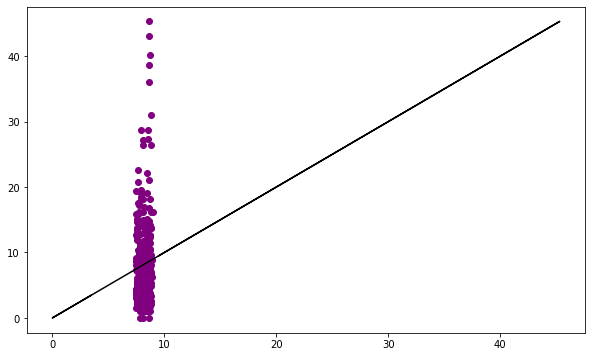

In [363]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'purple')
plt.plot(y_values, y_values, color="black")
plt.show()

In [364]:
X = northern["latitude"]
X = sm.add_constant(X) # adding a constant

y = northern["wind"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   wind   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.219
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.270
Time:                        20:29:11   Log-Likelihood:                -1179.5
No. Observations:                 354   AIC:                             2363.
Df Residuals:                     352   BIC:                             2371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3990      0.791      9.348      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

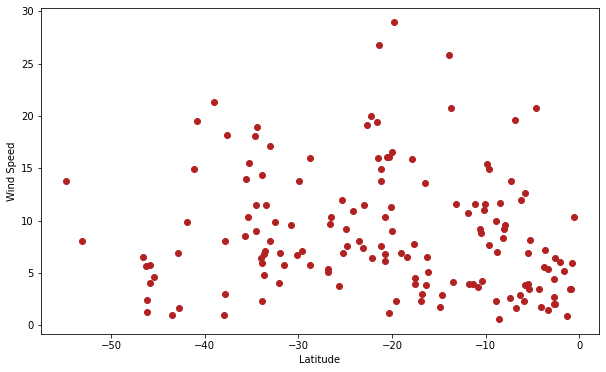

In [365]:
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['wind']
plt.scatter(x_values,y_values, color= 'firebrick')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [366]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [367]:
linregress(x_values, y_values)

LinregressResult(slope=-0.05633280314130378, intercept=7.585923126048766, rvalue=-0.13066338832796892, pvalue=0.10742576664273909, stderr=0.03478400802837986, intercept_stderr=0.861860970146527)

In [368]:
preds = x_values * slope + intercept

preds

1      9.944561
4      7.619723
6      8.982475
8      8.344073
13     7.627570
         ...   
528    7.887766
537    7.657280
539    8.153087
540    8.158642
548    7.735205
Name: latitude, Length: 153, dtype: float64

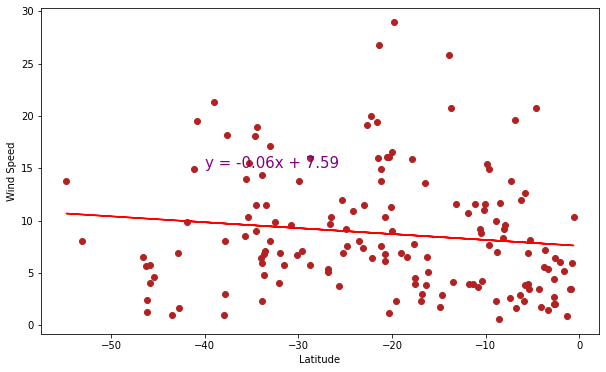

In [369]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,6))
x_values = southern['latitude']
y_values = southern['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="firebrick")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("swind_regression.png")
plt.show()

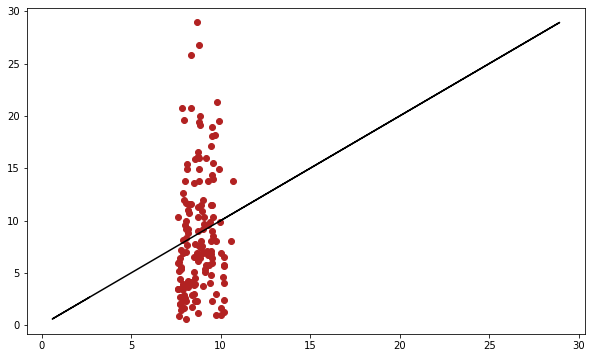

In [370]:
plt.figure(figsize=(10,6))
plt.scatter(preds, y_values,color = 'firebrick')
plt.plot(y_values, y_values, color="black")
plt.show()

In [371]:
X = southern["latitude"]
X = sm.add_constant(X) # adding a constant

y = southern["wind"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   wind   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.623
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.107
Time:                        20:29:45   Log-Likelihood:                -484.51
No. Observations:                 153   AIC:                             973.0
Df Residuals:                     151   BIC:                             979.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5859      0.862      8.802      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
